In [1]:
import torch
import pandas as pd

In [83]:
w = torch.tensor([[0.],[0.],[0.]], requires_grad=True)
tmp = (y-torch.mm(x,w))
Y = torch.mean(1/2*torch.mm(tmp.T, tmp))
# w.shape
Y.backward()
Y.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [66]:
ttt = -1*torch.matmul(x.T, y)
ttt

tensor([-20400., -24322.,  -1836.])

In [81]:
Y.backward()
w.grad

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [38]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(3, 1, bias=True )
        
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred
    
model = LinearModel()
criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, weight_decay=0.1)

for epoch in range(200):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    if epoch%10 == 0:
        print(epoch, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

# print('b = ', model.linea.bias.item())

0 1036.1953125
10 1.0189915895462036
20 0.8569296002388
30 0.7277219295501709
40 0.6245462894439697
50 0.5420341491699219
60 0.47595176100730896
70 0.4229546785354614
80 0.3803957998752594
90 0.34617653489112854
100 0.3186298906803131
110 0.296429842710495
120 0.2785196006298065
130 0.2640557289123535
140 0.25236406922340393
150 0.2429049164056778
160 0.23524561524391174
170 0.22903886437416077
180 0.2240055501461029
190 0.2199210673570633


In [28]:
model(x)

tensor([[1.7591],
        [1.6856],
        [1.7958],
        [1.5700],
        [1.7628],
        [1.4707],
        [1.5718],
        [1.5193],
        [1.7211],
        [1.3823],
        [1.5491],
        [1.5513],
        [1.7613],
        [1.5525],
        [1.6215],
        [1.6331],
        [1.5106],
        [1.8135],
        [1.4949],
        [1.5947],
        [1.4283],
        [1.4409],
        [1.4430],
        [1.5947],
        [1.7025],
        [1.4355],
        [1.4756],
        [1.4756],
        [1.5318],
        [1.6053],
        [1.6753],
        [1.6373],
        [1.4722],
        [1.6913],
        [1.6561],
        [1.5562],
        [1.6893],
        [1.3899],
        [1.4162],
        [1.5424],
        [1.3637],
        [1.3706],
        [1.6036],
        [1.3385],
        [1.5511],
        [1.6509],
        [1.3514],
        [1.3571],
        [1.3847],
        [1.5511],
        [1.6898],
        [1.5843],
        [1.5843],
        [1.6948],
        [1.3655],
        [1

In [42]:
x_data = torch.tensor([[1.0], [2.0], [3.0]],  dtype=torch.float32)
y_data = torch.tensor([[2.], [4.], [6.]])
x_data.shape

torch.Size([3, 1])

In [74]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linea = torch.nn.Linear(1, 1, bias=True)
        
    def forward(self, x):
        y_pred = self.linea(x)
        return y_pred

In [75]:
model = LinearModel()
criterion = torch.nn.MSELoss(reduce='meam')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)


D:\anaconda3\envs\dl\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


In [76]:
for epoch in range(200):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    if epoch%10 == 0:
        print(epoch, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print('w = ', model.linea.weight.item())
print('b = ', model.linea.bias.item())

0 4.900431156158447
10 0.5295999646186829
20 0.11281478404998779
30 0.07255915552377701
40 0.06818318367004395
50 0.06724913418292999
60 0.06666713207960129
70 0.06614184379577637
80 0.0656440481543541
90 0.06516989320516586
100 0.06471806019544601
110 0.0642874464392662
120 0.06387706845998764
130 0.0634860023856163
140 0.06311329454183578
150 0.06275811046361923
160 0.062419623136520386
170 0.06209703907370567
180 0.06178960204124451
190 0.06149662658572197
w =  0.4126071631908417
b =  -0.4680022597312927


In [77]:
x_test = torch.tensor([[2.], [8,]])
y_test = model(x_test)
y_test

tensor([[0.3572],
        [2.8329]], grad_fn=<AddmmBackward0>)

In [78]:
x_data = torch.tensor([[1.0], [2.0], [3.0]])
y_data = torch.tensor([[0], [0], [1]], dtype=torch.float32)

In [85]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1, bias=True)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [86]:
model = LinearModel()
criterion = torch.nn.BCELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [87]:
for epoch in range(1000):
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
    if epoch%10 == 0:
        print(epoch, loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())

0 0.9505650401115417
10 0.9162644743919373
20 0.8868486881256104
30 0.8618752360343933
40 0.8408457636833191
50 0.8232410550117493
60 0.8085508346557617
70 0.7962965965270996
80 0.786047637462616
90 0.7774274945259094
100 0.77011638879776
110 0.763847827911377
120 0.7584037184715271
130 0.7536080479621887
140 0.7493205070495605
150 0.7454301714897156
160 0.7418498992919922
170 0.7385117411613464
180 0.7353631854057312
190 0.732363224029541
200 0.7294804453849792
210 0.7266908288002014
220 0.7239757180213928
230 0.7213211059570312
240 0.7187158465385437
250 0.7161517143249512
260 0.7136223912239075
270 0.711122989654541
280 0.7086498141288757
290 0.7061998248100281
300 0.7037710547447205
310 0.7013618350028992
320 0.6989704966545105
330 0.6965964436531067
340 0.6942387223243713
350 0.6918967366218567
360 0.6895699501037598
370 0.6872580647468567
380 0.6849607825279236
390 0.6826775670051575
400 0.6804086565971375
410 0.6781533360481262
420 0.6759119033813477
430 0.6736839413642883
440 0

In [88]:

model(x_data)

tensor([[0.3714],
        [0.4480],
        [0.5271]], grad_fn=<SigmoidBackward0>)

##########################

In [3]:
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader

In [12]:
tmp = pd.read_csv('C:\\Users\\84910\\py\\data\\haberman.data',  names=['age', 'year', 'num', 'label'])
tmp

,age,year,num,label
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [140]:
class Haberman_dataset(Dataset):
    def __init__(self, filepath):
        df = pd.read_csv(filepath,  names=['age', 'year', 'num', 'label'])
        self.len = df.shape[0]
        self.x_data = torch.tensor(df.iloc[:,0:3].values, dtype=torch.float32)
        self.y_data = torch.tensor(df.iloc[:,[-1]].values - 1, dtype=torch.float32)
        
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]
    
    def __len__(self):
        return self.len
    
dataset = Haberman_dataset('C:\\Users\\84910\\py\\data\\haberman.data')
train_loader = DataLoader(dataset=dataset, batch_size=8, shuffle=True)

In [177]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(3, 16)
        self.linear2 = torch.nn.Linear(16, 1)
        self.linear3 = torch.nn.Linear(6, 1)
        self.sigmoid = torch.nn.Sigmoid()
        self.relu = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        
        return x

In [178]:
import matplotlib.pyplot as plt

model = Model()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

ls = []
for epoch in range(20):
    for i, (inputs, labels) in enumerate(train_loader):
        y_pred = model(inputs)
        loss = criterion(y_pred, labels)
        print(loss)
        ls.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

tensor(116.3839, grad_fn=<MseLossBackward0>)
tensor(3.1371, grad_fn=<MseLossBackward0>)
tensor(3.3857, grad_fn=<MseLossBackward0>)
tensor(0.8409, grad_fn=<MseLossBackward0>)
tensor(1.5946, grad_fn=<MseLossBackward0>)
tensor(0.2430, grad_fn=<MseLossBackward0>)
tensor(0.6089, grad_fn=<MseLossBackward0>)
tensor(1.9497, grad_fn=<MseLossBackward0>)
tensor(2.7383, grad_fn=<MseLossBackward0>)
tensor(1.6285, grad_fn=<MseLossBackward0>)
tensor(1.6195, grad_fn=<MseLossBackward0>)
tensor(2.2602, grad_fn=<MseLossBackward0>)
tensor(1.0975, grad_fn=<MseLossBackward0>)
tensor(0.8218, grad_fn=<MseLossBackward0>)
tensor(0.9793, grad_fn=<MseLossBackward0>)
tensor(15.9105, grad_fn=<MseLossBackward0>)
tensor(3.1668, grad_fn=<MseLossBackward0>)
tensor(0.8711, grad_fn=<MseLossBackward0>)
tensor(1.9566, grad_fn=<MseLossBackward0>)
tensor(2.6165, grad_fn=<MseLossBackward0>)
tensor(1.5571, grad_fn=<MseLossBackward0>)
tensor(0.7963, grad_fn=<MseLossBackward0>)
tensor(4.4760, grad_fn=<MseLossBackward0>)
tensor(4

tensor(0.1437, grad_fn=<MseLossBackward0>)
tensor(0.2063, grad_fn=<MseLossBackward0>)
tensor(0.3489, grad_fn=<MseLossBackward0>)
tensor(0.1433, grad_fn=<MseLossBackward0>)
tensor(0.1071, grad_fn=<MseLossBackward0>)
tensor(0.3369, grad_fn=<MseLossBackward0>)
tensor(0.1904, grad_fn=<MseLossBackward0>)
tensor(0.1476, grad_fn=<MseLossBackward0>)
tensor(0.1481, grad_fn=<MseLossBackward0>)
tensor(0.4201, grad_fn=<MseLossBackward0>)
tensor(0.1920, grad_fn=<MseLossBackward0>)
tensor(0.3534, grad_fn=<MseLossBackward0>)
tensor(0.1474, grad_fn=<MseLossBackward0>)
tensor(0.5983, grad_fn=<MseLossBackward0>)
tensor(0.2599, grad_fn=<MseLossBackward0>)
tensor(0.3077, grad_fn=<MseLossBackward0>)
tensor(0.1256, grad_fn=<MseLossBackward0>)
tensor(0.1770, grad_fn=<MseLossBackward0>)
tensor(0.1065, grad_fn=<MseLossBackward0>)
tensor(0.2280, grad_fn=<MseLossBackward0>)
tensor(0.3303, grad_fn=<MseLossBackward0>)
tensor(0.2751, grad_fn=<MseLossBackward0>)
tensor(0.3023, grad_fn=<MseLossBackward0>)
tensor(0.20

tensor(0.3023, grad_fn=<MseLossBackward0>)
tensor(0.1673, grad_fn=<MseLossBackward0>)
tensor(0.2310, grad_fn=<MseLossBackward0>)
tensor(0.1049, grad_fn=<MseLossBackward0>)
tensor(0.0998, grad_fn=<MseLossBackward0>)
tensor(0.1173, grad_fn=<MseLossBackward0>)
tensor(0.4098, grad_fn=<MseLossBackward0>)
tensor(0.2258, grad_fn=<MseLossBackward0>)
tensor(0.2099, grad_fn=<MseLossBackward0>)
tensor(0.1800, grad_fn=<MseLossBackward0>)
tensor(0.2445, grad_fn=<MseLossBackward0>)
tensor(0.3359, grad_fn=<MseLossBackward0>)
tensor(0.2671, grad_fn=<MseLossBackward0>)
tensor(0.2264, grad_fn=<MseLossBackward0>)
tensor(0.4191, grad_fn=<MseLossBackward0>)
tensor(0.1508, grad_fn=<MseLossBackward0>)
tensor(0.2821, grad_fn=<MseLossBackward0>)
tensor(0.2030, grad_fn=<MseLossBackward0>)
tensor(0.3108, grad_fn=<MseLossBackward0>)
tensor(0.1713, grad_fn=<MseLossBackward0>)
tensor(0.2426, grad_fn=<MseLossBackward0>)
tensor(0.1014, grad_fn=<MseLossBackward0>)
tensor(0.1131, grad_fn=<MseLossBackward0>)
tensor(0.05

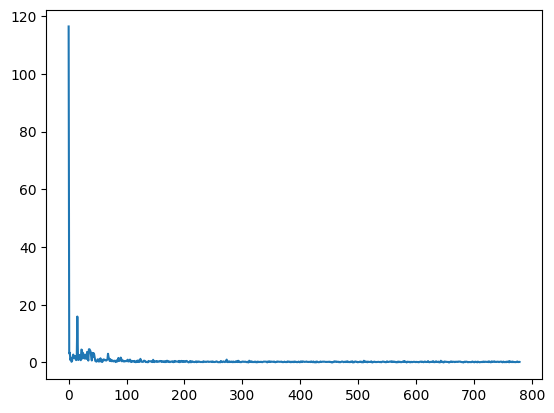

In [179]:
plt.plot(ls)

In [182]:
dataset[62]

(tensor([43., 58., 52.]), tensor([1.]))

In [184]:

print(model(dataset[97][0]))

tensor([0.3660], grad_fn=<AddBackward0>)
